In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/HP/Desktop/Machine Learning/AndrewNg/Health Prediction/hcare_data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Age', ylabel='Outcome'>

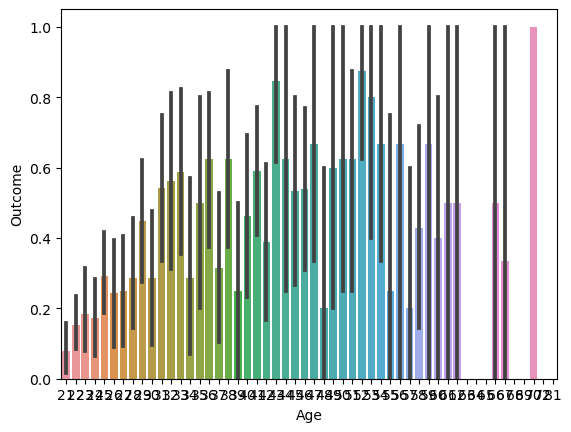

In [6]:
sns.barplot(y='Outcome',x='Age',data=data)

In [7]:
# now let's rename the columns ....
new_names=["pregnancies","glucose","BP","skin thickness","insulin","BMI","DPF","age","diabetes"]
data.columns=new_names
data.head()

,pregnancies,glucose,BP,skin thickness,insulin,BMI,DPF,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
Y=data['diabetes']
X=data.drop(columns=["diabetes","skin thickness"])
print(X)

     pregnancies  glucose  BP  insulin   BMI    DPF  age
0              6      148  72        0  33.6  0.627   50
1              1       85  66        0  26.6  0.351   31
2              8      183  64        0  23.3  0.672   32
3              1       89  66       94  28.1  0.167   21
4              0      137  40      168  43.1  2.288   33
..           ...      ...  ..      ...   ...    ...  ...
763           10      101  76      180  32.9  0.171   63
764            2      122  70        0  36.8  0.340   27
765            5      121  72      112  26.2  0.245   30
766            1      126  60        0  30.1  0.349   47
767            1       93  70        0  30.4  0.315   23

[768 rows x 7 columns]


In [10]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)
print(x_train)

[[-0.25095213 -0.15318486  0.25303625 ... -0.72249772 -1.10196973
  -0.78628618]
 [-1.14185152 -0.5287506  -0.26394125 ... -0.53211885 -0.05398855
  -0.87137393]
 [ 1.82781311  0.12848945  0.04624525 ... -0.11328534 -0.8059981
   0.66020563]
 ...
 [-0.54791859  0.22238089  0.45982725 ...  1.43512945  2.27150283
  -0.19067191]
 [-0.54791859 -0.49745345 -0.57412775 ...  0.36900779 -0.74559573
  -0.70119842]
 [ 0.04601433  0.22238089  0.04624525 ...  0.29285624 -0.51002647
  -0.78628618]]


In [12]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
predict=model.predict(x_test)


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
score=accuracy_score(y_test,predict)
print(score)

0.7760416666666666
